# Some Variations of Banach's Matchbox Problem

Banach's matchbox problem is a good entry point into stochastic stopping problems. A man buys two matchbooks and puts one in each of his two pockets. He then selects a matchbox at random from either pocket, uses a single match, and then returns the matchbox to the same pocket. This problem is slightly different from the classic matchbox problem in that when the last match is taken, the sequence ends. In the classic problem, discovery of the empty box happens only when the empty box is selected **after** being emptied.

The question is: **What is the probability of $k$ matches in the remaining matchbox? **

The problem is given two matchbooks containing $n$ matches each and with a matchbook placed in both the left and right pockets, if a person reaches into one or the other pocket at random with equal probability, what is the probability of there being $k$ matches in the other pocket when the matchbook in the selected pocket is found to be empty?  That is, the person keeps reaching alternatively and at random to sample a match from either pocket until one of the pockets is exhausted of matches.

This is easy to code up in Python using a generator:

In [109]:
from __future__ import  division
from collections import Counter, OrderedDict
import pandas as pd
import random
import numpy as np
from scipy.misc import comb
random.seed(12345)

In [110]:
def step(n=4):
  'keep track of remaining matches in each matchbook'
  a = b = n
  while a>0 and b>0:
    if random.randint(0,1):
        a-=1
    else:
        b-=1
    yield (a,b)

Thus, suppose there are $n=4$ matches in each matchbook, then a valid sequence of draws from the `(left,right`) pocket is the following:

`[(4, 3), (4, 2), (3, 2), (3, 1), (3, 0)]`

This means that the first draw is from the right pocket leaving `3` matches there and `4` matches in the left pocket. The next draw again
samples a match from the right pocket leaving `2` matches there and `4` in the left pocket. For the following draw, the left pocket is chosen leaving `3` matches there and `2` matches in the right pocket. This continues until the right pocket is emptied `(3,0)`. We can draw this sequence using the following code:

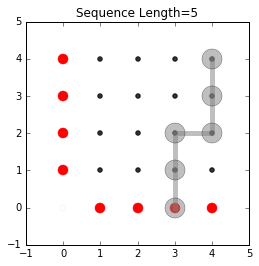

In [111]:
from __future__ import division
%matplotlib inline
from matplotlib.pylab import subplots,mgrid

def draw_grid(n=4):
    'draw square grid of `n` dimensions'
    fig,ax = subplots()
    i,j=mgrid[0:n+1,0:n+1]
    ax.scatter(i.flat,j.flat,alpha=.8,color='black')
    ax.set_aspect(1)
    ax.plot(0,0,'ow',mec='w'); # remove origin
    ax.plot([0,]*4,range(1,5),'or',mec='r',ms=10)
    ax.plot(range(1,5),[0,]*4,'or',mec='r',ms=10)
    return ax

def draw_path(seq,ax,color='gray',alpha=0.5):
    x,y=zip(*seq)
    n = max(seq[0])
    ax.plot((n,)+x,(n,)+y,marker='o',markersize=20,
            alpha=alpha,color=color,lw=5)
    ax.set_title('Sequence Length=%d'%(len(x)))    
            
ax = draw_grid()
draw_path([(4, 3), (4, 2), (3, 2), (3, 1), (3, 0)],ax)

In the figure above, the red circles indicate the termination points where one of the pockets has been emptied. The `(4,4)` point is the starting point with incremental steps moving down and to the left until one of the red circles is encountered. The length of the sequence is indicated in the title. In this case it took five draws in total to exhaust one of the matchbooks and terminate the sequence.

The classical matchbox problem is to find the probability of termination at a particular circle. For example, what is the probability that the sequence terminates with one match remaining in the other matchbook? In the figure above, this means terminating at `(1,0)` or `(0,1)`.

Specifically, termination at `(1,0)` means accumulating four steps down and three steps left in any sequence. This is the same as the $n$ *choose* $k$ binomial coefficient $\texttt{Binom}(n,k)$. We can compute this using `scipy` as the following with $n=7,k=3$:

In [112]:
print comb(7,3,exact=True)

35


The problem with this approach is that we can accidentally count paths that would have terminated earlier. For example,

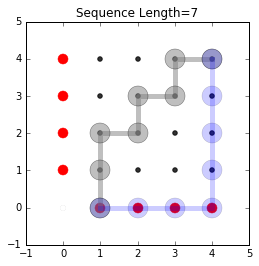

In [113]:
ax = draw_grid()
draw_path([(3, 4), (3, 3), (2, 3), (2, 2), (1, 2), (1, 1), (1, 0)],ax)
draw_path([(4,3), (4, 2), (4, 1), (4, 0), (3, 0), (2, 0), (1, 0)],ax,'blue',.2)

The blue path would never have gotten so long because it would have encountered the termination point at `(4,0)`. Thus, this straight-forward counting scheme would over-count by including these paths. The following figure shows these valid paths that terminate at `(1,0)`:

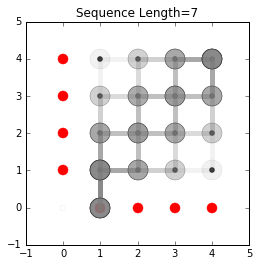

In [114]:
paths=[[(3, 4),(2, 4),(1, 4),(1, 3),(1, 2),(1, 1),(1, 0)],
[(3, 4),(2, 4),(2, 3),(1, 3),(1, 2),(1, 1),(1, 0)],
[(3, 4),(2, 4),(2, 3),(2, 2),(1, 2),(1, 1),(1, 0)],
[(3, 4),(2, 4),(2, 3),(2, 2),(2, 1),(1, 1),(1, 0)],
[(3, 4),(3, 3),(2, 3),(1, 3),(1, 2),(1, 1),(1, 0)],
[(3, 4),(3, 3),(2, 3),(2, 2),(1, 2),(1, 1),(1, 0)],
[(3, 4),(3, 3),(2, 3),(2, 2),(2, 1),(1, 1),(1, 0)],
[(3, 4),(3, 3),(3, 2),(2, 2),(1, 2),(1, 1),(1, 0)],
[(3, 4),(3, 3),(3, 2),(2, 2),(2, 1),(1, 1),(1, 0)],
[(3, 4),(3, 3),(3, 2),(3, 1),(2, 1),(1, 1),(1, 0)],
[(4, 3),(3, 3),(2, 3),(1, 3),(1, 2),(1, 1),(1, 0)],
[(4, 3),(3, 3),(2, 3),(2, 2),(1, 2),(1, 1),(1, 0)],
[(4, 3),(3, 3),(2, 3),(2, 2),(2, 1),(1, 1),(1, 0)],
[(4, 3),(3, 3),(3, 2),(2, 2),(1, 2),(1, 1),(1, 0)],
[(4, 3),(3, 3),(3, 2),(2, 2),(2, 1),(1, 1),(1, 0)],
[(4, 3),(3, 3),(3, 2),(3, 1),(2, 1),(1, 1),(1, 0)],
[(4, 3),(4, 2),(3, 2),(2, 2),(1, 2),(1, 1),(1, 0)],
[(4, 3),(4, 2),(3, 2),(2, 2),(2, 1),(1, 1),(1, 0)],
[(4, 3),(4, 2),(3, 2),(3, 1),(2, 1),(1, 1),(1, 0)],
[(4, 3),(4, 2),(4, 1),(3, 1),(2, 1),(1, 1),(1, 0)]]

ax = draw_grid()
for i in paths:
    draw_path(i,ax,alpha=.1)
   

Let's change our perspective slightly. Instead let's examine the probability of a sequence of a certain length and see if we can use that to answer the classic question. To start with, the following figure shows valid four-long sequences. The diagonal elements are indicated in green and these are the termination points for all four-long sequences. There are $2^4=16$ such sequences.

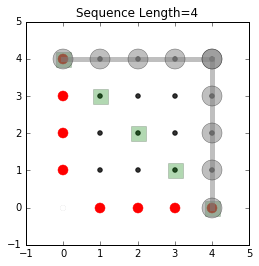

In [115]:
ax = draw_grid()
for i in zip(range(5)[::-1],range(5)):
    ax.plot(i[0],i[1],'sg',ms=15,alpha=.3)
draw_path([(3,4),(2,4),(1,4),(0,4)],ax)
draw_path([(4,3),(4,2),(4,1),(4,0)],ax)

Because only two of the sixteen valid  sequences result in termination, the probability of termination with a four-long sequence is $P_4 = \frac{2}{16}= \frac{1}{8}$. Now let's examine the diagonal elements with the following labels.

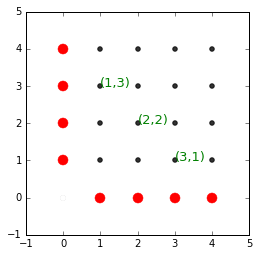

In [116]:
ax = draw_grid()
for i in zip(range(1,4)[::-1],range(1,4)):
    ax.text(i[0],i[1],'(%d,%d)'%i,fontsize=13,color='g')

We can use the labels to compute the number of paths that terminate at each of the diagonal elements.

| Label | Number of Paths|
|-------|----------------|
| (1,3) | $\texttt{binom}(4,1)=4$|
| (2,2) | $\texttt{binom}(4,2)=6$|
| (3,1) | $\texttt{binom}(4,1)=4$|

This means that there are `16-2=4+6+4=14` paths out of the initial group of `16` that have yet to terminate. Now, let's consider sequences of length five. The following figure shows the migration of paths to the next lower diagonal corresponding to the five-long sequences.

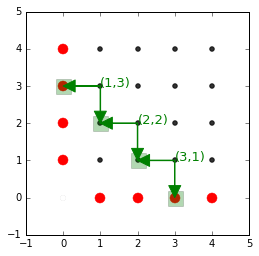

In [117]:
# construct matrix of indices for convenience
i,j=np.meshgrid(range(5),range(4,-1,-1))
m= i+1j*j

ax = draw_grid()
for i in np.diagonal(m,-1):
    ax.plot(i.real,i.imag,'sg',ms=15,alpha=.3)

for i in np.diagonal(m,0):
    if i.real==0 or i.imag==0: continue
    ax.text(i.real,i.imag,'(%d,%d)'%(i.real,i.imag),fontsize=13,color='g')

# add arrow markers
heads=map(lambda i:(i.real,i.imag),np.diagonal(m,0))[1:-1]

for i,j in heads:
    t=(i-1,j)
    ax.annotate("",xy=(i-1,j),xytext=(i,j),
                arrowprops=dict(width=.5,color='green'),
                )
    ax.annotate("",xy=(i,j-1),xytext=(i,j),
                arrowprops=dict(width=.5,color='green'),
                )

Note that two arrows end up at red termini. There are `28=2*14` paths in total (because each diagonal element can go either down or right). Of these `28`, eight terminate on a red circle. Thus, under these conditions, the probability of a terminating five-long sequence is therefore $p_5 = \frac{8}{28}=\frac{2}{7}$. Next, we can draw the next layer corresponding to six-long sequences.

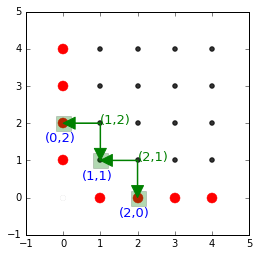

In [118]:
ax = draw_grid()
for i in np.diagonal(m,-2):
#     if i.real==0 or i.imag==0: continue
    ax.plot(i.real,i.imag,'sg',ms=15,alpha=.3)
    
for i in np.diagonal(m,-1):
    if i.real==0 or i.imag==0: continue
    ax.text(i.real,i.imag,'(%d,%d)'%(i.real,i.imag),fontsize=13,color='g')

for i in np.diagonal(m,-2):
#     if i.real==0 or i.imag==0: continue
    ax.text(i.real-0.5,i.imag-0.5,'(%d,%d)'%(i.real,i.imag),fontsize=13,color='blue')

    
# add arrow markers
heads=map(lambda i:(i.real,i.imag),np.diagonal(m,-1))[1:-1]

for i,j in heads:
    t=(i-1,j)
    ax.annotate("",xy=(i-1,j),xytext=(i,j),
                arrowprops=dict(width=.5,color='green'),
                )
    ax.annotate("",xy=(i,j-1),xytext=(i,j),
                arrowprops=dict(width=.5,color='green'),
                )

In the last stage, there were `8` out of `28` paths that terminated. That leaves `20` paths still in play and therefore `40` paths on the indicated diagonal.  In terms of our earlier accounting, we have

| Label | Number of Paths|
|-------|----------------|
| <span style=color:green>(1,2)</span> | 10|
| <span style=color:green>(2,1)</span> | 10|


For the next layer, we have the following:

| Label | Number of Paths|
|-------|----------------|
| <span style=color:blue>(0,2)</span> | 10|
| <span style=color:blue>(2,0)</span> | 10|
| <span style=color:blue>(1,1)</span>  | 20|

With this accounting, the probability of termination with a six-long
sequence is $p_6=\frac{20}{40}=\frac{1}{2}$. Finally, because all paths going through `(1,1)` terminate at either `(1,0)` or `(0,1)`, we have $p_7=1$.

To assemble all these results, recall we have
$$ P_4=\frac{1}{8}$$

and also, because $p_4 = P(T_5| \hat{T}_4)$ where $T_5$ is the probability of termination in five steps and $\hat{T}_4$ is the probability of not terminating in four steps, we have

$$ P_5 = p_5 (1-P_4) = \frac{2}{7} \frac{7}{8}=\frac{1}{4}$$

Likewise for $P_6$,

$$ P_6 = p_6 (1-P_4)(1-p_5) = \frac{1}{2}\frac{7}{8}\frac{5}{7} =\frac{5}{16}$$

Finally, for $P_7$, we have the following:

$$ P_7 = p_7 (1-P_4)(1-p_5)(1-p_6) = 1\frac{7}{8}\frac{5}{7}\frac{1}{2} =\frac{5}{16}$$

Note that

$$ P_4+P_5+P_6+P_7 = 1 $$

A quick simulation can bear this out. 

In [119]:
Counter([len(tuple(step())) for i in range(1000)])

Counter({4: 125, 5: 232, 6: 330, 7: 313})

We can automate this process in the following code

In [120]:
from scipy.misc import comb
import numpy as np

In [121]:
from __future__ import division
n=4
t = np.array([comb(n,i,exact=True) for i in range(n+1)],dtype=int)
print t
t[[0,-1]].sum()/t.sum()
# split
(t[1],t[-2])

[1 4 6 4 1]


(4, 4)

In [122]:
from numpy.lib.stride_tricks import as_strided
np.hstack([t[1],as_strided(t[1:-1],(2,3-2+1),(t.itemsize,)*2).sum(axis=1),t[-2]])

array([ 4, 10, 10,  4])

In [123]:
from scipy.misc import comb

In [124]:
x=[comb(4,i,exact=True) for i in range(5)]
print x
print x[0]*2/sum(x)

[1, 4, 6, 4, 1]
0.125


In [125]:
a = x.pop(0)
b = x.pop()
x=[ x[0] ]+[ sum(x[slice(i,i+2)]) for i in range(len(x)-1) ]+[ x[-1] ]

In [126]:
print 2*x[0]/sum(x)

0.285714285714


In [127]:
def probstop(n=4):
    o=OrderedDict()
    k=n
    x=[comb(n,i,exact=True) for i in range(n+1)]
    o[k]=2*x[0]/sum(x)
    while len(x)>2:
        a = x.pop(0)
        b = x.pop()
        x=[x[0]]+[sum(x[slice(i,i+2)]) for i in range(len(x)-1)]+[x[-1]]
        k+=1
        o[k]=2*x[0]/sum(x)
        assert o[k]>0
    p = OrderedDict()
    p[n] = o[n]
    factor = 1-o[n]
    m = n+1
    for k,v in o.iteritems():
        print 'k=',k
        print 'v=',v
        print 'factor',factor
        if k==n: continue
        print '=='*10
        p[k]=factor*o[k]
        factor = factor*(1-v)        
    return o,p

In [128]:
o,p=probstop(5)

k= 5
v= 0.0625
factor 0.9375
k= 6
v= 0.166666666667
factor 0.9375
k= 7
v= 0.3
factor 0.78125
k= 8
v= 0.5
factor 0.546875
k= 9
v= 1.0
factor 0.2734375


In [129]:
o

OrderedDict([(5, 0.0625),
             (6, 0.16666666666666666),
             (7, 0.3),
             (8, 0.5),
             (9, 1.0)])

In [130]:
p

OrderedDict([(5, 0.0625),
             (6, 0.15625),
             (7, 0.234375),
             (8, 0.2734375),
             (9, 0.2734375)])

In [131]:
sum(p.values())

1.0

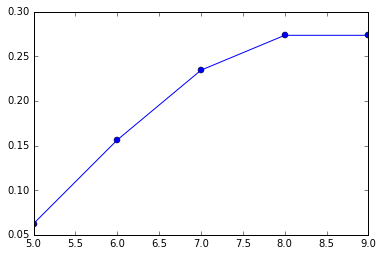

In [132]:
fig,ax=subplots()
ax.plot(p.keys(),p.values(),'-o')

In [133]:
w=pd.Series(Counter([len(tuple(step(5))) for i in range(5000)]))
(w/5000.).plot(ax=ax,marker='s')

In [136]:
fig

SyntaxError: invalid syntax (<ipython-input-136-68cb07aab6c2>, line 1)

In [137]:
list(step(20))

[(20, 19),
 (20, 18),
 (19, 18),
 (19, 17),
 (19, 16),
 (18, 16),
 (17, 16),
 (16, 16),
 (16, 15),
 (15, 15),
 (14, 15),
 (13, 15),
 (12, 15),
 (12, 14),
 (12, 13),
 (12, 12),
 (11, 12),
 (11, 11),
 (10, 11),
 (10, 10),
 (10, 9),
 (10, 8),
 (9, 8),
 (8, 8),
 (7, 8),
 (6, 8),
 (6, 7),
 (5, 7),
 (4, 7),
 (4, 6),
 (3, 6),
 (2, 6),
 (1, 6),
 (1, 5),
 (0, 5)]